https://datascience.stackexchange.com/questions/49316/multidimensional-scaling-producing-different-results-for-different-seeds

In [17]:
import pandas as pd
import numpy as np
from sklearn import manifold
import matplotlib.pyplot as plt

data = pd.read_csv("european_city_distances.csv", sep=";", index_col="City")

In [28]:
def create_mds(data, random_state):
    mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=random_state, verbose=0)
    return mds.fit(data.values)

def plot(data, results):
    cities = data.columns
    coords = results.embedding_

    fig = plt.figure(figsize=(12,10))

    plt.subplots_adjust(bottom = 0.1)
    plt.scatter(coords[:, 0], coords[:, 1])

    for label, x, y in zip(cities, coords[:, 0], coords[:, 1]):
        plt.annotate(
            label,
            xy = (x, y), 
            xytext = (-20, 20),
            textcoords = 'offset points'
        )
    plt.show()

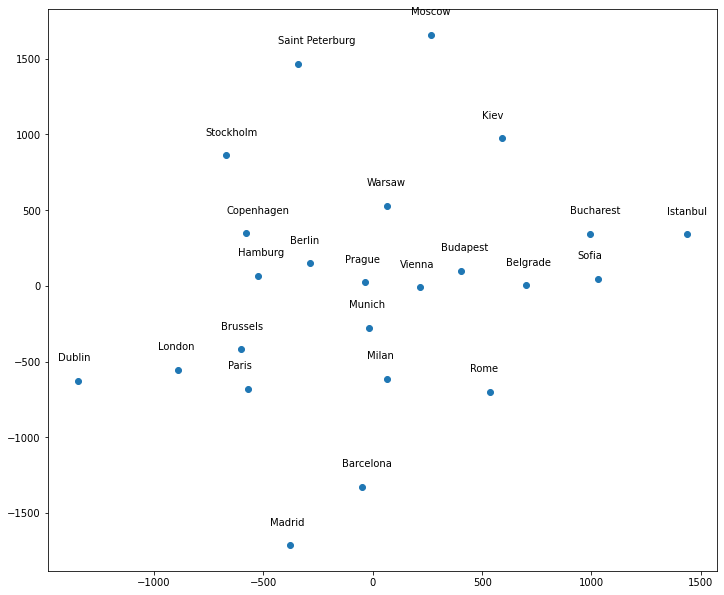

In [29]:
plot(data, create_mds(data, 6))

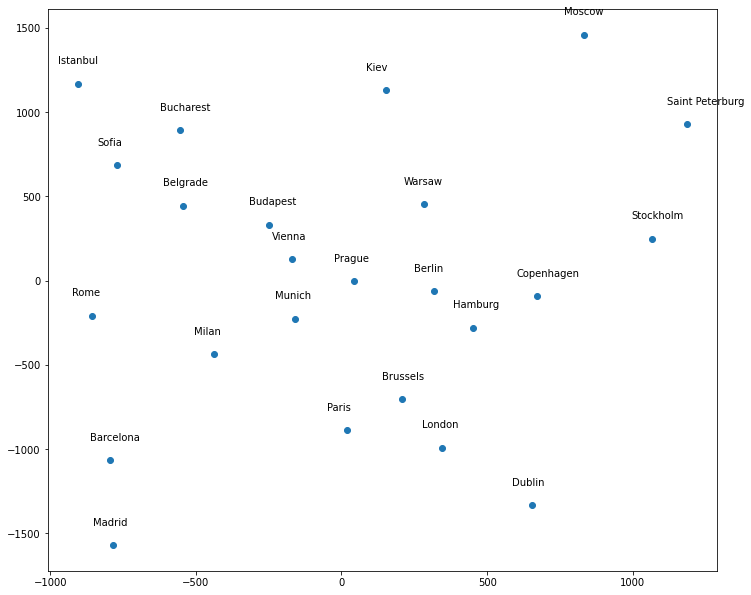

In [30]:
plot(data, create_mds(data, 4))

/home/chris/anaconda3/envs/Derive_Conceptualspace/lib/python3.8/site-packages/sklearn/manifold/_mds.py:517: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


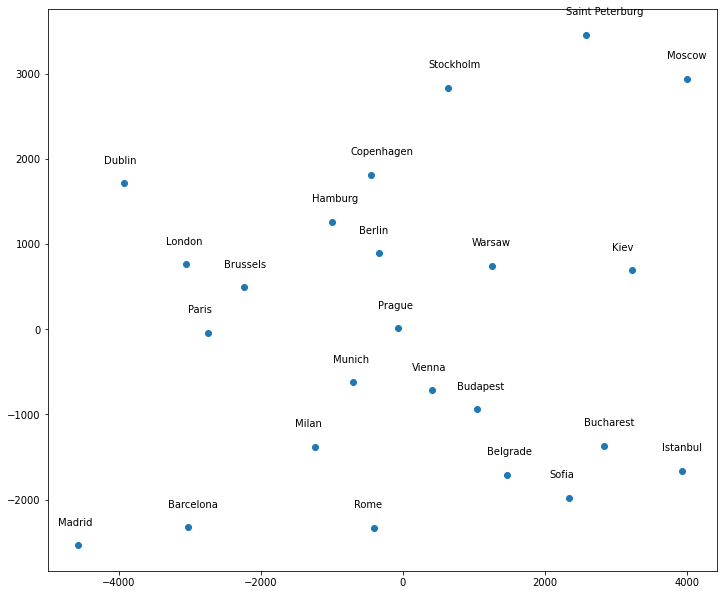

In [31]:
plot(data, manifold.MDS(n_components=2, dissimilarity="euclidean", n_init=100, max_iter=1000, random_state=1).fit(data))